Supervised Learning - Labelled Data

Classification - It is about predicting a class or discrete values.
Ex. Male/Female, True/False

Regression - It ia about predicting a quantity or contineous values.
Ex. Salary, Age, Price

CASE -

In this case we are predicting the Price of House (Label) which is contineous value.

So we are using Regression Algorithm to solve this

WORK FLOW -

Boston House Price Data

Data PreProcessing

Data Analysis

Train Test Split

XGBoost Regressor (It contains various Decision Trees)

Model Evaluation

Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

Importing Boston House Price Dataset

In [5]:
data = sklearn.datasets.load_boston()

In [6]:
print(data)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [8]:
# Loading dataset to a Pandas DataFrame

df = pd.DataFrame(data.data, columns = data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
# Adding target column to DataFrame

df['Price'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
# Checking no of rows & columns

df.shape

(506, 14)

In [12]:
# Checking missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [13]:
# Statistical Measures of the data

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Understanding the Correlation between various features in the dataset

1. Positive Correlation - If one variable increases then the other variable also increases

2. Negative Correlation - If one variable decreases then the other variable increases

In [14]:
correlation = df.corr()

<AxesSubplot:>

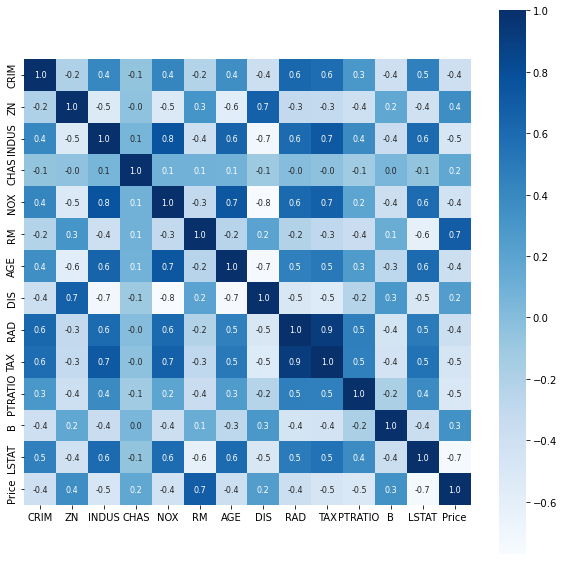

In [16]:
# Plotting HeatMap to understand the correlation

plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Splitting the Data & Target

In [17]:
x = df.drop(['Price'], axis = 1)
y = df['Price']

In [18]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Splitting the data into training data & testing data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [20]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


Model Training

XGBoost Regressor - It is a type of decision tree algorithm based ensemble model (means we use more than one model, it is like incorporating two or more models together)

In [21]:
# Loading the model

model = XGBRegressor()

In [22]:
# Training the model with x_train

model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

Model Evaluation

Prediction on training data

In [24]:
# Accuracy for prediction on training data

train_data_predict = model.predict(x_train)
print(train_data_predict)

[23.147501  20.99463   20.090284  34.69053   13.903663  13.510157
 21.998634  15.1940975 10.899711  22.709627  13.832816   5.592794
 29.810236  49.99096   34.89215   20.607384  23.351097  19.23555
 32.695698  19.641418  26.991022   8.401829  46.00729   21.708961
 27.062933  19.321356  19.288303  24.809872  22.61626   31.70493
 18.542515   8.697379  17.395294  23.700663  13.304856  10.492197
 12.688369  25.016556  19.67495   14.902088  24.193798  25.007143
 14.900281  16.995798  15.6009035 12.699232  24.51537   14.999952
 50.00104   17.525454  21.184624  31.998049  15.613355  22.89754
 19.325378  18.717896  23.301125  37.222923  30.09486   33.102703
 21.00072   49.999332  13.405827   5.0280113 16.492886   8.405072
 28.64328   19.499939  20.586452  45.402164  39.79833   33.407326
 19.83506   33.406372  25.271482  50.001534  12.521657  17.457413
 18.61758   22.602625  50.002117  23.801117  23.317268  23.087355
 41.700035  16.119293  31.620516  36.069206   7.0022025 20.3827
 19.996452  11.

In [25]:
# R squared error

score1 = metrics.r2_score(y_train, train_data_predict)

# Mean absolute error

score2 = metrics.mean_absolute_error(y_train, train_data_predict)

print('R squared error :', score1)
print('Mean Absolute Error :', score2)

R squared error : 0.9999948236320982
Mean Absolute Error : 0.0145848437110976


Visualising actual prices & predicted prices of training data

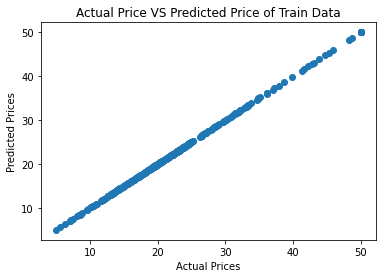

In [29]:
plt.scatter(y_train, train_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price VS Predicted Price of Train Data')
plt.show()

Prediction on Test data

In [26]:
# Accuracy for prediction on testing data

test_data_predict = model.predict(x_test)
print(test_data_predict)

[20.288406  20.60247   30.9758    29.910797   8.624953  14.235525
 23.523052  29.730324  31.97293   22.015892  27.946804  24.034412
 20.771402  21.849985  12.024127  22.074675  18.487509  11.052485
  8.141267  15.730722  23.163914  20.233883  35.700928  19.041637
 15.129744  20.228016  47.067314  30.426474  32.729023  17.345776
 17.889462  19.40687   30.769133  25.431686  12.05332   17.900238
 11.031679  21.109531  20.64321   21.982754  25.016281  12.648555
 31.042107   7.106914  18.685764  14.380013  34.902393  16.130005
 32.98537   10.950912  27.335018  29.399937   7.0065055 35.398712
 22.978228  18.582758  19.224293  20.003431  15.341814  22.38517
 19.077105  21.955967  18.91404   32.77595   32.76772   24.36317
 48.262913  23.385014  10.551914  22.664684  14.671612   8.881822
 16.700302  17.221045  26.204681  26.826794  21.590458  21.61216
 19.662537  23.533224  33.25156   17.105299  19.517323  29.344427
 48.885273  35.723255  18.257914  24.461905  27.235567  21.319864
 21.661198  2

In [27]:
# R squared error

score1 = metrics.r2_score(y_test, test_data_predict)

# Mean absolute error

score2 = metrics.mean_absolute_error(y_test, test_data_predict)

print('R squared error :', score1)
print('Mean Absolute Error :', score2)

R squared error : 0.8711660369151691
Mean Absolute Error : 2.2834744154238233


Visualising actual prices & predicted prices of Testing data

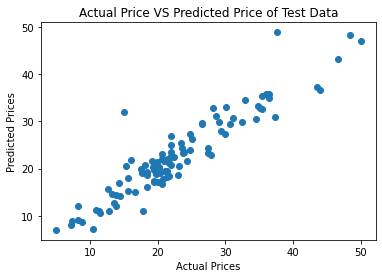

In [30]:
plt.scatter(y_test, test_data_predict)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price VS Predicted Price of Test Data')
plt.show()

CONCLUSION -

Our model is performing pretty good.